# **HW - simple ML sklearn** 
Author: Tanapol Yootaworn 

Date: 20 Feb 2023\
source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set?datasetId=818300&sortBy=voteCount

## **Read Data And Clean Data** 

In [ ]:

# library 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd 
import numpy as np

# read data 
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
diabetes = pd.read_csv(url)


In [ ]:
# preview head data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# preview tail data
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# info check missing value
diabetes.isna().sum() # non missing value?

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# describe 
diabetes.describe()

## observe at minimum values, the Pregnancies, Glucose, BloodPresure, SkinThickness, Insulin and BMI are 0 ?
## assume that they filled NaN value with 0 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ideal: We will fill minimum value(0) above with median value 

In [ ]:
diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]\
 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [ ]:
diabetes.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

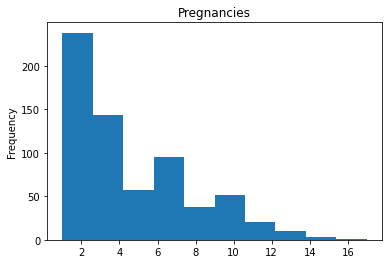

In [ ]:
diabetes['Pregnancies'].plot(kind='hist').set_title('Pregnancies');

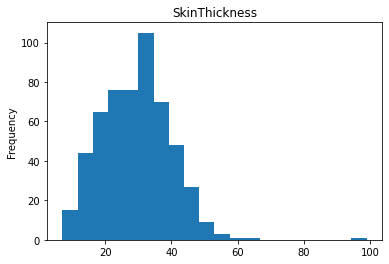

In [ ]:
diabetes['SkinThickness'].plot(kind='hist', bins = 20).set_title('SkinThickness');

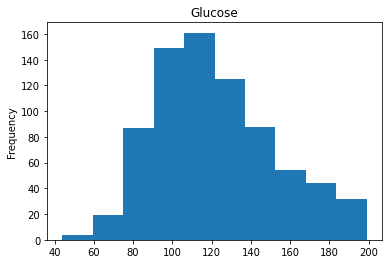

In [ ]:
diabetes['Glucose'].plot(kind='hist').set_title("Glucose");

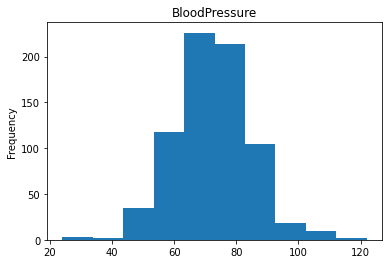

In [ ]:
diabetes['BloodPressure'].plot(kind='hist').set_title("BloodPressure");

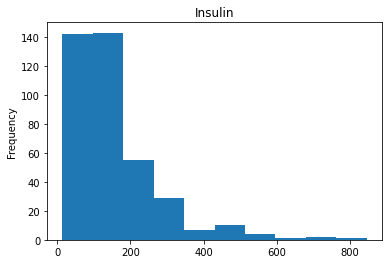

In [ ]:
diabetes['Insulin'].plot(kind='hist').set_title("Insulin");
# use median

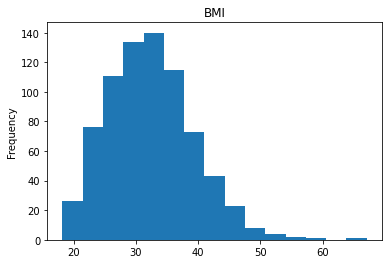

In [ ]:
diabetes['BMI'].plot(kind='hist', bins=15).set_title("BMI");

In [ ]:
# The missing values will be filled with the median values of each variable.

def median_target(var):   
    
    temp = diabetes[diabetes[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp


In [ ]:
columns = diabetes.columns

columns = columns.drop("Outcome")

for col in columns:
    
    diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes[col].isnull()), col] = median_target(col)[col][0]
    diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes[col].isnull()), col] = median_target(col)[col][1]

In [ ]:
# check missing value final!
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## **Split Data**

In [ ]:
# prepare data
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 28 #set.seed()
)

In [ ]:
print(f"X_train: {X_train.shape} \ny_train: {y_train.shape}")


X_train: (537, 8) 
y_train: (537,)


## **Logistic Regression (Classification)**

### **Predicted New Data (Scoring)**

In [ ]:
# train model
gl_model = LogisticRegression()
gl_model.fit(X_train, y_train)

# test model
p = gl_model.predict(X_test)
print(p)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 1 0 1]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, p) # accuracy score

0.8095238095238095

In [ ]:
from sklearn.metrics import classification_report
tag_names = ['without diabetes', 'diabetes']
print(classification_report(y_test, p, target_names = tag_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.89      0.86       151
        diabetes       0.76      0.66      0.71        80

        accuracy                           0.81       231
       macro avg       0.79      0.77      0.78       231
    weighted avg       0.81      0.81      0.81       231



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, p))

[[134  17]
 [ 27  53]]


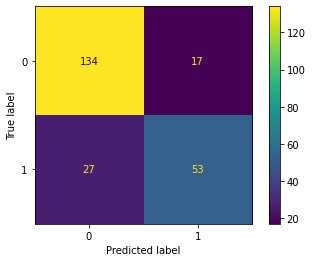

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, p)
disp = ConfusionMatrixDisplay(conf_matrix,)
disp.plot();

## **Linear Regression**

## **Split Data**

In [ ]:
# prepare data 
X = diabetes.drop(['BMI'], axis=1)
y = diabetes['BMI']

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 99 #set.seed()
)
    

### **Predicted New Data (Scoring)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# train model
tree_model = RandomForestRegressor()
tree_model.fit(X_train, y_train)

# test model
p_tree = tree_model.predict(X_test)
print(p_tree)

[32.477 27.705 25.815 28.285 35.179 34.192 28.957 26.434 29.747 33.028
 32.085 39.614 27.743 31.593 31.252 39.552 25.739 36.68  37.605 30.488
 29.945 27.782 28.645 29.009 30.338 30.934 40.65  35.264 26.626 29.443
 40.292 30.376 36.201 31.552 31.442 34.695 35.141 24.642 36.167 33.616
 32.596 26.935 32.889 31.122 26.545 23.421 37.24  38.129 35.286 28.808
 32.299 23.383 32.286 38.515 31.511 31.73  33.279 28.182 25.508 34.285
 32.002 34.111 38.805 36.876 27.834 28.315 26.732 35.16  32.219 31.608
 31.387 34.924 36.109 33.174 28.24  31.781 33.099 33.38  36.996 35.684
 36.91  31.199 25.335 25.316 32.884 28.519 32.864 40.592 37.994 25.507
 28.492 33.722 31.672 28.806 25.603 26.125 34.134 34.415 34.59  28.892
 36.592 29.382 32.939 32.236 29.483 29.325 30.213 25.485 35.005 32.63
 36.338 29.844 37.347 28.081 35.215 33.548 34.091 25.861 25.766 35.41
 26.292 36.313 26.533 28.299 34.327 26.365 31.048 37.644 41.144 41.293
 26.38  35.952 36.627 39.51  24.949 29.556 34.261 30.006 32.274 37.595
 39.365 

## **Model Evaluation**

In [ ]:
tree_model.score(X_test, y_test) # R2

0.43531492102461167